<a href="https://colab.research.google.com/github/Ankur099IIT/CNN-in-tensorflow--Course-2-Deeplearning.ai/blob/main/Data_Augmentation_on_horses_and_humans_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Dwonload training set

!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-04-29 11:43:00--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  48.5MB/s    in 2.9s    

2022-04-29 11:43:03 (48.5 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [3]:
# download validation set

!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip


--2022-04-29 11:43:03--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  38.5MB/s    in 0.3s    

2022-04-29 11:43:04 (38.5 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [5]:
import zipfile

zip_ref = zipfile.ZipFile('/content/horse-or-human.zip', 'r')
zip_ref.extractall('/content/horse-or-human')
zip_ref = zipfile.ZipFile('/content/validation-horse-or-human.zip', 'r')
zip_ref.extractall('/content/validation-horse-or-human')
zip_ref.close()

In [6]:
import os

os.getcwd()

train_horse_dir = os.path.join('/content/horse-or-human/horses')

train_human_dir = os.path.join('/content/horse-or-human/humans')

val_horse_dir = os.path.join('/content/validation-horse-or-human/horses')

val_human_dir = os.path.join('/content/validation-horse-or-human/humans')




In [7]:
horse_images = os.listdir(train_horse_dir)
horse_images[:4]

['horse21-6.png', 'horse37-8.png', 'horse16-7.png', 'horse31-9.png']

In [8]:
# Data preprocesing with image augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen  = ImageDataGenerator(rescale = 1.0/255.0,
                                    rotation_range =40,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest')

training_generator = train_datagen.flow_from_directory(directory = '/content/horse-or-human',
                                                       target_size = (150,150),
                                                       batch_size = 128,
                                                       class_mode = 'binary')

validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(directory = '/content/validation-horse-or-human',
                                                              target_size = (150,150),
                                                              batch_size = 32,
                                                              class_mode = 'binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [11]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  
  model = tf.keras.Sequential([
           tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150,150,3)),
           tf.keras.layers.MaxPooling2D(2,2),
           tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
           tf.keras.layers.MaxPooling2D(2,2),
           tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
           tf.keras.layers.MaxPooling2D(2,2),
           tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
           tf.keras.layers.MaxPooling2D(2,2),
           tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
           tf.keras.layers.MaxPooling2D(2,2),

           tf.keras.layers.Flatten(),
           tf.keras.layers.Dense(units = 512, activation = 'relu'),
           tf.keras.layers.Dense(1, activation = 'sigmoid')           
  ])

  model.compile(loss = 'binary_crossentropy',
                optimizer = RMSprop(learning_rate = 0.001),
                metrics = ['accuracy'])
  
  return model

In [12]:
model = create_model()

history = model.fit(training_generator,
                    steps_per_epoch = 8,
                    epochs = 20,
                    validation_data = validation_generator,
                    validation_steps = 8)

Epoch 1/20
8/8 [==============================] - 32s 4s/step - loss: 0.6992 - accuracy: 0.4928 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 31s 4s/step - loss: 0.6888 - accuracy: 0.5317 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 32s 4s/step - loss: 0.6858 - accuracy: 0.5462 - val_loss: 0.6981 - val_accuracy: 0.5000
Epoch 4/20
8/8 [==============================] - 32s 4s/step - loss: 0.7314 - accuracy: 0.6051 - val_loss: 0.6382 - val_accuracy: 0.5195
Epoch 5/20
8/8 [==============================] - 48s 6s/step - loss: 0.6772 - accuracy: 0.6377 - val_loss: 0.5957 - val_accuracy: 0.6836
Epoch 6/20
8/8 [==============================] - 40s 5s/step - loss: 0.6925 - accuracy: 0.6196 - val_loss: 0.6285 - val_accuracy: 0.5000
Epoch 7/20
8/8 [==============================] - 36s 4s/step - loss: 0.7048 - accuracy: 0.6652 - val_loss: 0.5968 - val_accuracy: 0.5195
Epoch 8/20
8/8 [==================

In [13]:
import matplotlib.pyplot as plt
def plot_loss_acc(history):

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', 'Training Accuracy')
  plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.figure()

  plt.plot(epochs, loss, 'r', 'Training Loss')
  plt.plot(epochs, val_loss, 'b', 'Validation Loss')
  plt.title('Training and Validation Loss')
  plt.figure()


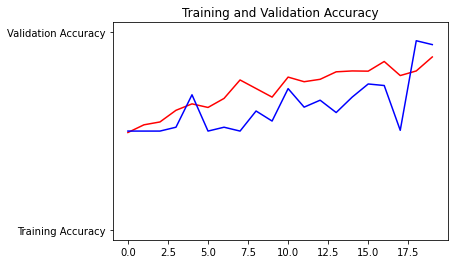

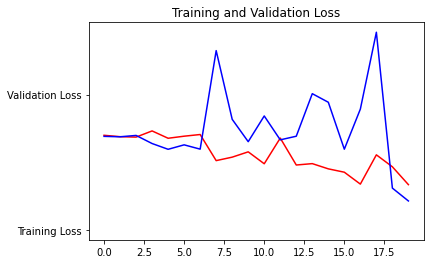

<Figure size 432x288 with 0 Axes>

In [14]:
plot_loss_acc(history)